## Install necessary packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich.jupyter import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
import plotly.express as px

## Load datasets into dataframes

In [13]:
google_play_data = pd.read_csv('data/googleplaystore.csv')
android_data = pd.read_csv('data/googleplaystore_user_reviews.csv')

## Cleaning the data

In [14]:
google_play_data.info()
android_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

### Handling missing and inconsistent data

In [15]:
google_play_data['Rating'].fillna(google_play_data['Rating'].median())
google_play_data['Category'] = google_play_data['Category'].str.upper()

### Merge dataframes

In [16]:
merged_df = pd.merge(google_play_data, android_data, on='App', how='inner')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


## EDA

#### Popular categories by number of apps

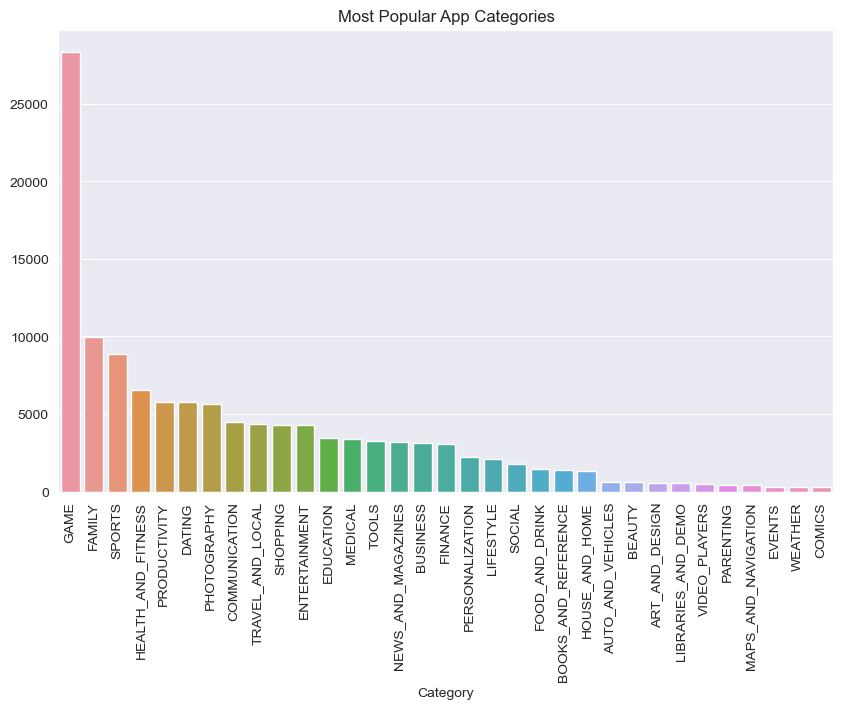

In [18]:
category_counts = merged_df['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Most Popular App Categories')
plt.xticks(rotation=90)
plt.show()

#### Comparison between ratings and number of downloads

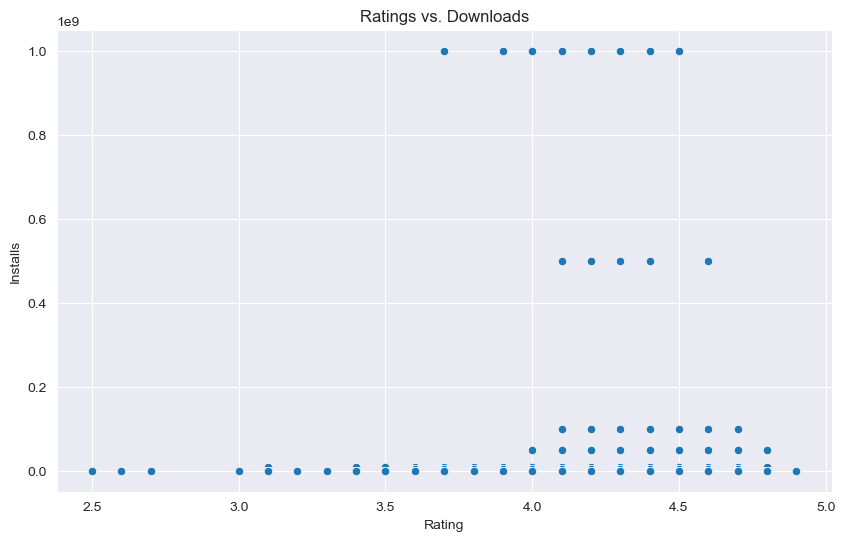

In [26]:
merged_df_sorted = merged_df.sort_values(by='Installs', ascending=True)
merged_df_sorted['Installs'] = merged_df_sorted['Installs'].str.replace(',', '').str.replace('+', '')
merged_df_sorted['Installs'] = merged_df_sorted['Installs'].astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_sorted, x='Rating', y='Installs')
plt.title('Ratings vs. Downloads')
plt.show()

#### Distribution of free versus paid apps

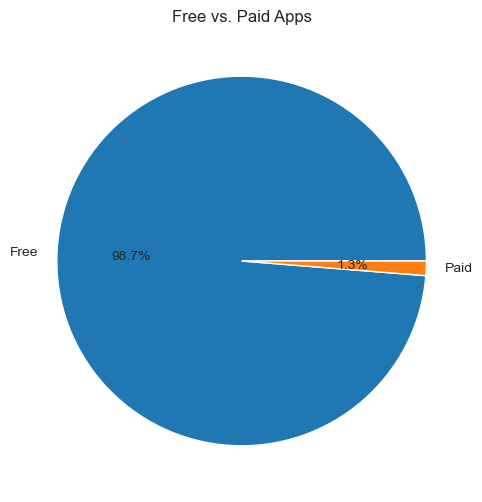

In [31]:
free_paid_counts = merged_df['Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(free_paid_counts, labels=free_paid_counts.index, autopct='%1.1f%%')
plt.title('Free vs. Paid Apps')
plt.show()

## Prepping Data for Machine Learning

In [35]:
merged_df['Installs'] = merged_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
merged_df['Price'] = merged_df['Price'].str.replace('$', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [67]:
features = merged_df[['Installs', 'Reviews', 'Price']]
target = merged_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [68]:
y_train.isna().sum()

X_train_cleaned = X_train[~y_train.isna()]
y_train_cleaned = y_train.dropna()
y_test = np.nan_to_num(y_test, nan=np.mean(y_test))

y_train.fillna(y_train.mean(), inplace=True)

### Machine Learning - Regression

In [69]:
model = LinearRegression()
model.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.2826190024468032


### Machine Learning - Clustering

In [72]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)

merged_df['Cluster'] = clusters

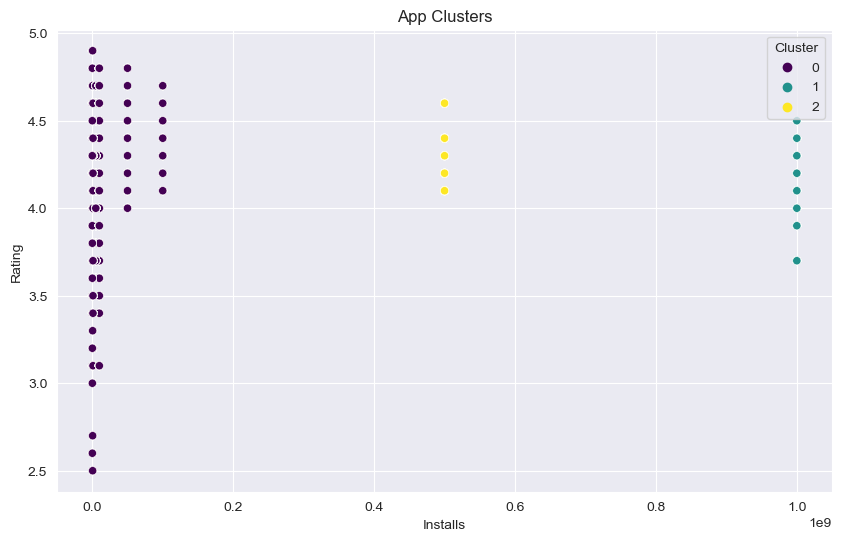

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Installs', y='Rating', hue='Cluster', palette='viridis')
plt.title('App Clusters')
plt.show()